# **<h1 style = "color:#4b8bbe">Pose & Posture Estimation(Yoga Asanas)</h1>**

<h1>Team Members:</h1>
  <br/>

<h2>
A Mohan Kumar - PES2UG20CS002<br/>
Abishek S  - PES2UG20CS014<br/>
Adithya Mathialagan - PES2UG20CS019
</h2>

TYPES OF YOGA POSES:

1.BRIDGE POSE<br/>2.STANDING MOUNTAIN POSE<br/>3.TREE POSE<br/>4.PIGEON POSE<br/>5.DOWNWARD DOG<br/>6.TRIANGLE POSE<br/>7.COBRA<br/>8.WARRIOR 2<br/>9.SEATED TWIST<br/>10.CHILD'S POSE

# Step 1.Importing Required Modules

In [13]:
# The OS module in Python provides functions for interacting with the operating system.
import os

# Matplotlib is one of the most popular Python packages used for data visualization.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

# OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
# cv2.imshow() method is used to display an image in a window.
import cv2
import re
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [14]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 2. Understanding the dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1)
from sklearn.utils import shuffle           
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tqdm import tqdm
from IPython.display import FileLink

In [16]:
labels=list()
path='./Dataset/'
for i in os.listdir(path):
    labels.append(i)
print(labels)

['Bridge-Pose', 'Child-Pose', 'Cobra-Pose', 'Downward-Dog-Pose', 'Pigeon-Pose', 'Seated-Twist-Pose', 'Standing-Mountain-Pose', 'Tree-Pose', 'Triangle-Pose', 'Warrior-Pose']


In [17]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Bridge-Pose= 268
Length of :Child-Pose= 261
Length of :Cobra-Pose= 197
Length of :Downward-Dog-Pose= 226
Length of :Pigeon-Pose= 210
Length of :Seated-Twist-Pose= 249
Length of :Standing-Mountain-Pose= 198
Length of :Tree-Pose= 334
Length of :Triangle-Pose= 274
Length of :Warrior-Pose= 209
Total Samples:2426


In [18]:
path = './Dataset/'
print('Total No of yoga poses in the dataset is:', len(os.listdir(path)))
posses_in_var = os.listdir(path)

Total No of yoga poses in the dataset is: 10


In [19]:
classes = os.listdir(path)
class_names_label = {class_name:i for i, class_name in enumerate(classes)}
labels = []
for folder in os.listdir(path):
    label = class_names_label[folder]
    for file in tqdm(os.listdir(os.path.join(path, folder))):
        labels.append(label)

100%|██████████| 209/209 [00:00<?, ?it/s]


In [20]:
no_of_images = []
for i in range(10):
    comp_path = path + posses_in_var[i]
    no_of_images.append(len(os.listdir(comp_path)))
no_of_images

[268, 261, 197, 226, 210, 249, 198, 334, 274, 209]

In [21]:
print('Total No of images:', sum(no_of_images))

Total No of images: 2426


<BarContainer object of 10 artists>

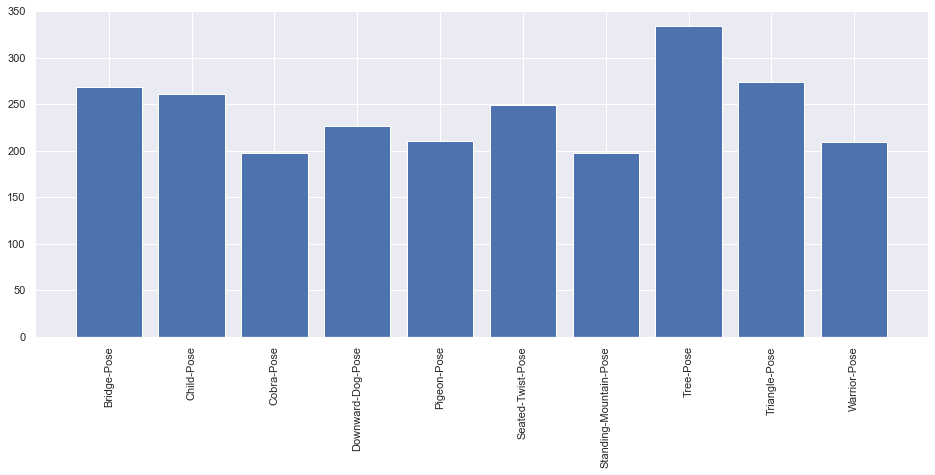

In [22]:
plt.figure(figsize = (16,6))
plt.xticks(rotation = 90)
plt.bar(posses_in_var, no_of_images)

# Step 3.Importing the Images from datset folder

In [23]:
images = []
asanas_name = []
images_path = []
images_pixels = []
labels = []
d = {}

i=0
dataset_path = 'Dataset'

for directory in os.listdir(dataset_path):
    asanas_name.append(directory)
    for img in os.listdir(os.path.join(dataset_path,directory)):  
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(dataset_path,directory),img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix, (100,100)))
            labels.append(i)
        
    i = i+1
    
print("Total images: ", len(images))
print("Total images path: ", len(images_path))
print("Total Postures: ", len(asanas_name))
print("Total images_pixels: ", len(images_pixels))

Total images:  2426
Total images path:  2426
Total Postures:  10
Total images_pixels:  2426


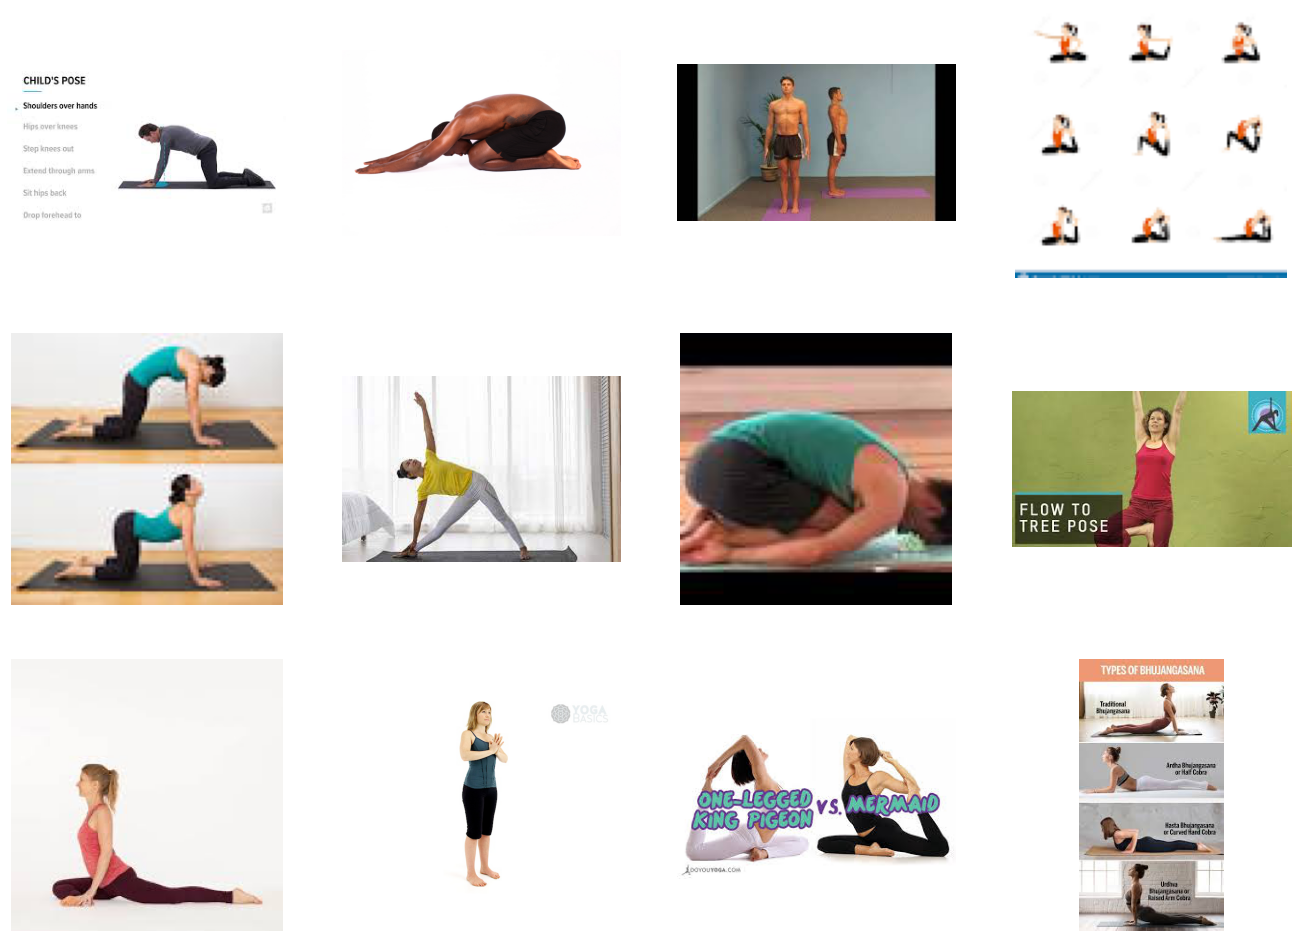

In [24]:
fig = plt.gcf()
fig.set_size_inches(23, 23)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [25]:
shuf = list(zip(images_pixels,labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)

# Step 4.Scaling and Splitting the data into Train and Validation

In [26]:
X_data = np.array(train_data)/255
Y_data =  to_categorical(labels_data, num_classes = 10)

In [27]:
#Splitting the Data into Training and Validation.
# 80-20 split.

X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.2, random_state=50)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  1940
X label data :  486
Y test data :  1940
Y label data :  486


In [28]:
nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_val.shape
X_test2 = X_val.reshape((nsamples,nx*ny*nrgb))

# <h1>Step 5.Building the Models</h1>

## Model 1 - Decision Tree Classifier:

### Parameters:
<b>1) criterion - “gini”, “entropy”, “log_loss” default=”gini”</b><br/>
The function to measure the quality of a split.<br/>

<b>2) min_samples_split  - default=2</b><br/>
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction.

<b>3) max_features - int, float or {“auto”, “sqrt”, “log2”}, default=None</b><br/>
The number of features to consider when looking for the best split.

If int, then consider max_features features at each split.

If float, then max_features is a fraction of features are considered at each split.

If “auto”, then max_features = sqrt(n_features).

If “sqrt”, then max_features = sqrt(n_features).

If “log2”, then max_features = log2(n_features).

If None, then max_features = n_features.


In [249]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',
                             min_samples_split=2, 
                             max_features='sqrt')
dtc.fit(X_train2,Y_train)

DecisionTreeClassifier(max_features='sqrt')

In [250]:
y_pred_dtc=dtc.predict(X_test2)
y_pred_dtc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [251]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [252]:
print(accuracy_score(y_pred_dtc,Y_val))
print(classification_report(y_pred_dtc,Y_val))

0.51440329218107
              precision    recall  f1-score   support

           0       0.56      0.48      0.51        63
           1       0.44      0.47      0.46        49
           2       0.48      0.61      0.53        38
           3       0.41      0.51      0.46        35
           4       0.55      0.51      0.53        41
           5       0.60      0.63      0.61        49
           6       0.55      0.57      0.56        37
           7       0.44      0.55      0.49        58
           8       0.59      0.51      0.55        57
           9       0.58      0.45      0.51        49

   micro avg       0.51      0.53      0.52       476
   macro avg       0.52      0.53      0.52       476
weighted avg       0.52      0.53      0.52       476
 samples avg       0.51      0.51      0.51       476



## Model 2- Random Forest Classifier:

### Parameters:

<b>1) n_estimatorsint -  default=100</b><br/>
The number of trees in the forest.<br/>

<b>2) criterion - “gini”, “entropy”, “log_loss” default=”gini”</b><br/>
The function to measure the quality of a split.<br/>

<b>3) min_samples_split  - default=2</b><br/>
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction.

<b>4) max_features - int, float or {“auto”, “sqrt”, “log2”}, default=None</b><br/>
The number of features to consider when looking for the best split.

If int, then consider max_features features at each split.

If float, then max_features is a fraction of features are considered at each split.

If “auto”, then max_features = sqrt(n_features).

If “sqrt”, then max_features = sqrt(n_features).

If “log2”, then max_features = log2(n_features).

If None, then max_features = n_features.

<b>5) bootstrap - bool, default=True</b><br/>
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.<br/>

<b>6) random_state - int, RandomState instance or None, default=None</b><br/>
Controls both the randomness of the bootstrapping of the samples used when building trees


In [253]:
#Implementing a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, 
                             criterion='gini',
                             min_samples_split=2,
                             min_samples_leaf=1, 
                             max_features='sqrt', 
                             bootstrap=False, 
                             random_state=1)

In [254]:
model.fit(X_train2,Y_train)


RandomForestClassifier(bootstrap=False, random_state=1)

In [255]:
y_pred_rfc=model.predict(X_test2)
y_pred_rfc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [256]:
print(accuracy_score(y_pred_rfc,Y_val))
print(classification_report(y_pred_rfc,Y_val))

0.5596707818930041
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        32
           1       0.54      1.00      0.70        28
           2       0.58      1.00      0.74        28
           3       0.55      1.00      0.71        24
           4       0.63      1.00      0.77        24
           5       0.62      0.97      0.75        33
           6       0.58      0.85      0.69        26
           7       0.45      0.92      0.61        36
           8       0.53      0.93      0.68        28
           9       0.61      1.00      0.75        23

   micro avg       0.56      0.96      0.71       282
   macro avg       0.57      0.97      0.71       282
weighted avg       0.56      0.96      0.71       282
 samples avg       0.56      0.56      0.56       282



## Model 3-KNN (K-Nearest Neighbours ):

### Parameters:

<b>1) n_neighbors - int, default=5</b><br/>
Number of neighbors to use by default for kneighbors queries.<br/>

<b>2) metric - str or callable, default=’minkowski’</b><br/>
Metric to use for distance computation. 
Default is “minkowski”, which results in the standard Euclidean distance when p = 2.
<br/>

<b>3) pint, default=2.</b><br/>
Power parameter for the Minkowski metric.<br/> 
When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.<br/>
For arbitrary p, minkowski_distance (l_p) is used


In [257]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [258]:
knn.fit(X_train2,Y_train)

KNeighborsClassifier()

In [259]:
y_pred_knn=knn.predict(X_test2)
y_pred_knn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [260]:
print(accuracy_score(y_pred_knn,Y_val))
print(classification_report(y_pred_knn,Y_val))

0.20781893004115226
              precision    recall  f1-score   support

           0       0.22      0.67      0.33        18
           1       0.29      0.47      0.36        32
           2       0.04      0.29      0.07         7
           3       0.20      0.69      0.32        13
           4       0.18      0.39      0.25        18
           5       0.12      0.86      0.20         7
           6       0.24      0.35      0.28        26
           7       0.26      0.40      0.32        47
           8       0.33      0.67      0.44        24
           9       0.16      0.60      0.25        10

   micro avg       0.21      0.50      0.29       202
   macro avg       0.20      0.54      0.28       202
weighted avg       0.24      0.50      0.31       202
 samples avg       0.21      0.21      0.21       202



# Model 4 : CNN-1

# CNN with 1 Convolutional Layer:

<b>This CNN takes as input tensors of shape (image_height, image_width, image_channels).</b>

In this case,CNN will process inputs of size (100, 100, 3), which is the format of the Yoga images. 

The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.

The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature, which helps shorten training time and reduce number of parameters. Here I choose the pooling window with size 2 x 2.

To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique. 
Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 30% of the neurons.

The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. 
These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. Thus, I need to flatten the 3D outputs to 1D, and then add 2 Dense layers on top.

I do a 10-way classification (as there are 10 classes of yoga images), using a final layer with 10 outputs and a softmax activation. 

Softmax activation enables me to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

When compiling the model, I choose categorical_crossentropy as the loss function (which is relevent for multiclass, single-label classification problem) and Adam optimizer.

The cross-entropy loss calculates the error rate between the predicted value and the original value.
Categorical is used because there are 10 classes to predict from. 
If there were 2 classes, I would have used binary_crossentropy.

The Adam optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. That is how a neural network learns.

In [261]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn1.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 dropout_96 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 flatten_35 (Flatten)        (None, 76832)             0         
                                                                 
 dense_35 (Dense)            (None, 10)                768330    
                                                                 
Total params: 769,226
Trainable params: 769,226
Non-trainable params: 0
_______________________________________________

In [262]:
history1 = cnn1.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/25
8/8 [==============================] - 8s 1s/step - loss: 17.5549 - accuracy: 0.1021 - val_loss: 10.3102 - val_accuracy: 0.1132
Epoch 2/25
8/8 [==============================] - 6s 813ms/step - loss: 9.5497 - accuracy: 0.1072 - val_loss: 6.0811 - val_accuracy: 0.1461
Epoch 3/25
8/8 [==============================] - 7s 881ms/step - loss: 5.0479 - accuracy: 0.1253 - val_loss: 2.8808 - val_accuracy: 0.1481
Epoch 4/25
8/8 [==============================] - 7s 837ms/step - loss: 2.5738 - accuracy: 0.2026 - val_loss: 2.5101 - val_accuracy: 0.1914
Epoch 5/25
8/8 [==============================] - 7s 895ms/step - loss: 2.1066 - accuracy: 0.2784 - val_loss: 2.1896 - val_accuracy: 0.1708
Epoch 6/25
8/8 [==============================] - 7s 884ms/step - loss: 1.9148 - accuracy: 0.3392 - val_loss: 1.9699 - val_accuracy: 0.3374
Epoch 7/25
8/8 [==============================] - 7s 846ms/step - loss: 1.7566 - accuracy: 0.4619 - val_loss: 1.9318 - val_accuracy: 0.3827
Epoch 8/25
8/8 [=====

In [263]:
score1 = cnn1.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 1.4254828691482544
Test accuracy: 0.5823045372962952


<Figure size 432x288 with 0 Axes>

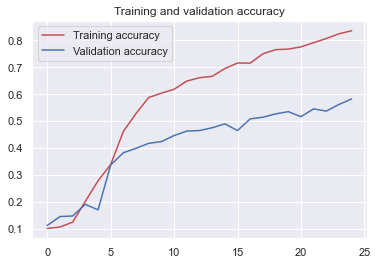

<Figure size 432x288 with 0 Axes>

In [266]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

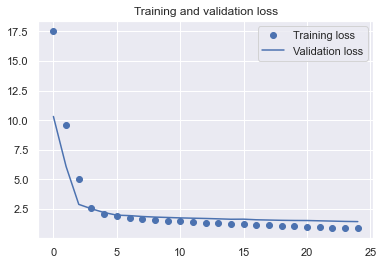

In [267]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model CNN-2

## CNN with 3 Convolutional Layers - LeakyRelu Activation Function

We configure the CNN to process inputs of size (100, 100, 3), which is the format of the Yoga posture images.

The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.

The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature.

To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique. 

Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 20% of the outputs.

I repeat these steps to add more hidden layers: 2 Conv2D layers,2 LeakyReLU layers with alpha(learning rate) = 0.01.

The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. 

I do a 10-way classification,using a final layer with 10 outputs and a softmax activation. 

Softmax activation enables to calculate the output based on the probabilities.

The cross-entropy loss calculates the error rate between the predicted value and the original value.

The Adam optimizer is an improvement over Stochastic Gradient Descent. The optimizer is responsible for updating the weights of the neurons via backpropagation

In [268]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [269]:
cnn2 = Sequential()

cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn2.add(MaxPooling2D((2, 2)))

cnn2.add(LeakyReLU(alpha=0.01))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.2))

cnn2.add(LeakyReLU(alpha=0.01))
cnn2.add(Dropout(0.2))

cnn2.add(LeakyReLU(alpha=0.01))
cnn2.add(Dropout(0.2))

cnn2.add(Flatten())

cnn2.add(Dense(10, activation='softmax'))

In [270]:
cnn2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn2.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_97 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 24, 24, 32)      

In [271]:
history2 = cnn2.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/25
8/8 [==============================] - 6s 725ms/step - loss: 2.6426 - accuracy: 0.1062 - val_loss: 2.3317 - val_accuracy: 0.1173
Epoch 2/25
8/8 [==============================] - 5s 650ms/step - loss: 2.2715 - accuracy: 0.1624 - val_loss: 2.1644 - val_accuracy: 0.2881
Epoch 3/25
8/8 [==============================] - 6s 784ms/step - loss: 2.0275 - accuracy: 0.3160 - val_loss: 2.0187 - val_accuracy: 0.3416
Epoch 4/25
8/8 [==============================] - 8s 1s/step - loss: 1.8537 - accuracy: 0.4222 - val_loss: 1.9363 - val_accuracy: 0.3580
Epoch 5/25
8/8 [==============================] - 8s 966ms/step - loss: 1.6752 - accuracy: 0.5062 - val_loss: 1.8182 - val_accuracy: 0.4424
Epoch 6/25
8/8 [==============================] - 7s 895ms/step - loss: 1.5453 - accuracy: 0.5371 - val_loss: 1.7636 - val_accuracy: 0.4506
Epoch 7/25
8/8 [==============================] - 7s 934ms/step - loss: 1.4238 - accuracy: 0.5825 - val_loss: 1.6806 - val_accuracy: 0.5000
Epoch 8/25
8/8 [=======

In [274]:
score1 = cnn2.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 1.2784124612808228
Test accuracy: 0.6481481194496155


<Figure size 432x288 with 0 Axes>

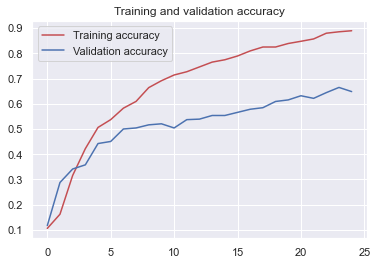

<Figure size 432x288 with 0 Axes>

In [272]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

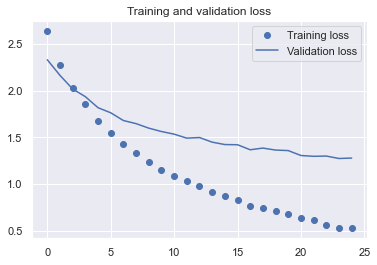

In [273]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## RELU vs LeakyRELU

<p>
ReLU: The derivative of the ReLU is 1 in the positive part, and 0 in the negative part.<br/>
LReLU: The derivative of the LReLU is 1 in the positive part, and is a small fraction in the negative part.<br/>
With a Leaky ReLU (LReLU), you won’t face the “dead ReLU” problem which happens when your ReLU always have values under 0.

If the derivative of the slope of the ReLU is of 0, absolutely no learning is performed on the layers below the dead ReLU, because 0 will be multiplied to the accumulated gradient for the weight update. 
Thus, you can have dead neurons. This problem doesn’t happen with LReLU.

In the ReLU case, you can end up with a neural network that never learns if the neurons are not activated at the start. You may have lots of dead ReLU without even knowing.

However, ReLU computes faster and can introduce a sort of “optimal brain damage” regularization in your machine learning algorithm.
</p>

# Model CNN-3

## CNN  - Relu Activation Function

In this case, I configure the CNN to process inputs of size (100, 100, 3), which is the format of the Yoga posture images.

The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.

The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature.

To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique. 

Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 20% of the outputs.

I repeat these steps to add more hidden layers: 2 Conv2D layers, 1 MaxPooling2D layers, and 2 Dropout layers.

The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. 
We do a 10-way classification,using a final layer with 10 outputs and a softmax activation. 

Softmax activation enables to calculate the output based on the probabilities.

The cross-entropy loss calculates the error rate between the predicted value and the original value.

The Adam optimizer is an improvement over Stochastic Gradient Descent. The optimizer is responsible for updating the weights of the neurons via backpropagation

In [279]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [280]:
cnn3 = Sequential()

cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn3.add(MaxPooling2D((2, 2)))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.2))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.2))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.2))

cnn3.add(Flatten())


cnn3.add(Dense(10, activation='softmax'))

In [281]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn3.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_100 (Dropout)       (None, 23, 23, 64)        0         
                                                                 
 conv2d_64 (Conv2D)          (None, 21, 21, 128)     

In [283]:
history3 = cnn3.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score3 = cnn3.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/25
8/8 [==============================] - 21s 3s/step - loss: 2.3026 - accuracy: 0.1222 - val_loss: 2.2894 - val_accuracy: 0.1502
Epoch 2/25
8/8 [==============================] - 23s 3s/step - loss: 2.2868 - accuracy: 0.1423 - val_loss: 2.2697 - val_accuracy: 0.1667
Epoch 3/25
8/8 [==============================] - 24s 3s/step - loss: 2.2224 - accuracy: 0.1861 - val_loss: 2.1187 - val_accuracy: 0.2346
Epoch 4/25
8/8 [==============================] - 23s 3s/step - loss: 2.0476 - accuracy: 0.2804 - val_loss: 2.0687 - val_accuracy: 0.2778
Epoch 5/25
8/8 [==============================] - 24s 3s/step - loss: 1.9381 - accuracy: 0.3284 - val_loss: 1.9719 - val_accuracy: 0.3086
Epoch 6/25
8/8 [==============================] - 24s 3s/step - loss: 1.8258 - accuracy: 0.3825 - val_loss: 1.9320 - val_accuracy: 0.3374
Epoch 7/25
8/8 [==============================] - 24s 3s/step - loss: 1.7305 - accuracy: 0.4129 - val_loss: 1.8520 - val_accuracy: 0.3621
Epoch 8/25
8/8 [==================

In [285]:
score1 = cnn3.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 2.0707602500915527
Test accuracy: 0.7263374328613281


In [303]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))

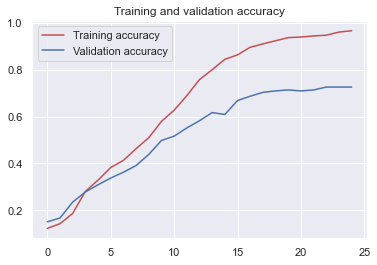

<Figure size 432x288 with 0 Axes>

In [306]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Model CNN-4

# CNN - Tanh Activation Function

In [314]:
cnn5 = Sequential()

cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn5.add(MaxPooling2D((2, 2)))

cnn5.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
cnn5.add(Dropout(0.2))

cnn5.add(Flatten())


cnn5.add(Dense(10, activation='softmax'))

In [315]:
cnn5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn5.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_106 (Dropout)       (None, 23, 23, 64)        0         
                                                                 
 conv2d_72 (Conv2D)          (None, 21, 21, 128)     

In [316]:
history5 = cnn5.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score5 = cnn5.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Epoch 1/25
8/8 [==============================] - 22s 3s/step - loss: 4.1433 - accuracy: 0.1165 - val_loss: 2.2848 - val_accuracy: 0.1605
Epoch 2/25
8/8 [==============================] - 26s 3s/step - loss: 2.3366 - accuracy: 0.1866 - val_loss: 2.1355 - val_accuracy: 0.2757
Epoch 3/25
8/8 [==============================] - 23s 3s/step - loss: 2.0030 - accuracy: 0.3093 - val_loss: 1.9563 - val_accuracy: 0.3272
Epoch 4/25
8/8 [==============================] - 25s 3s/step - loss: 1.8278 - accuracy: 0.4015 - val_loss: 1.8712 - val_accuracy: 0.3704
Epoch 5/25
8/8 [==============================] - 25s 3s/step - loss: 1.7137 - accuracy: 0.4361 - val_loss: 1.8165 - val_accuracy: 0.4095
Epoch 6/25
8/8 [==============================] - 24s 3s/step - loss: 1.6042 - accuracy: 0.4825 - val_loss: 1.7665 - val_accuracy: 0.3786
Epoch 7/25
8/8 [==============================] - 24s 3s/step - loss: 1.5054 - accuracy: 0.5263 - val_loss: 1.7888 - val_accuracy: 0.3827
Epoch 8/25
8/8 [==================

In [317]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(len(acc))


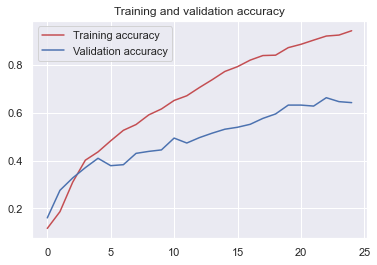

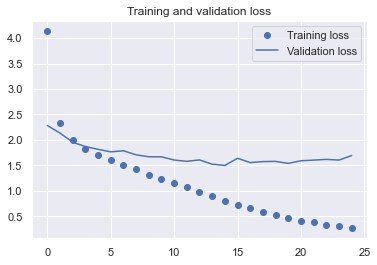

In [318]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model CNN-5

# CNN - Tanh Activation Function

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [320]:
cnn6 = Sequential()

cnn6.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn6.add(MaxPooling2D((2, 2)))

cnn6.add(Conv2D(74, kernel_size=(3, 3), activation='sigmoid'))
cnn6.add(MaxPooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.2))

cnn6.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid'))
cnn6.add(Dropout(0.2))

cnn6.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid'))
cnn6.add(Dropout(0.2))

cnn6.add(Flatten())


cnn6.add(Dense(10, activation='softmax'))

In [321]:
cnn6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn6.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 23, 23, 74)       0         
 g2D)                                                            
                                                                 
 dropout_109 (Dropout)       (None, 23, 23, 74)        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 21, 21, 128)     

In [322]:
history6 = cnn6.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score6 = cnn6.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Epoch 1/25
8/8 [==============================] - 23s 3s/step - loss: 10.8455 - accuracy: 0.1119 - val_loss: 2.4416 - val_accuracy: 0.0782
Epoch 2/25
8/8 [==============================] - 25s 3s/step - loss: 2.3327 - accuracy: 0.0892 - val_loss: 2.3031 - val_accuracy: 0.0926
Epoch 3/25
8/8 [==============================] - 26s 3s/step - loss: 2.3025 - accuracy: 0.1134 - val_loss: 2.3023 - val_accuracy: 0.1008
Epoch 4/25
8/8 [==============================] - 27s 3s/step - loss: 2.3020 - accuracy: 0.1160 - val_loss: 2.3019 - val_accuracy: 0.1008
Epoch 5/25
8/8 [==============================] - 27s 3s/step - loss: 2.3017 - accuracy: 0.1160 - val_loss: 2.3016 - val_accuracy: 0.1008
Epoch 6/25
8/8 [==============================] - 29s 4s/step - loss: 2.3014 - accuracy: 0.1160 - val_loss: 2.3013 - val_accuracy: 0.1008
Epoch 7/25
8/8 [==============================] - 29s 4s/step - loss: 2.3010 - accuracy: 0.1103 - val_loss: 2.3010 - val_accuracy: 0.1502
Epoch 8/25
8/8 [=================

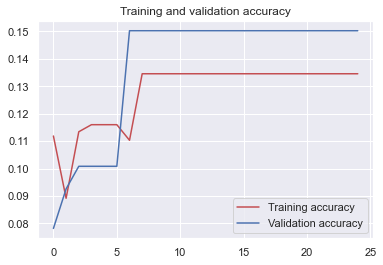

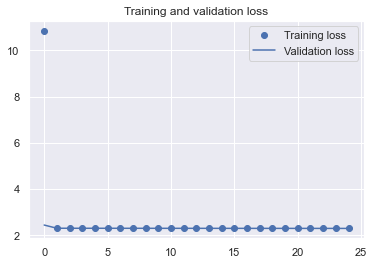

In [377]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model CNN-6

# CNN - Elu Activation Function

In [323]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [324]:
cnn7 = Sequential()

cnn7.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn7.add(MaxPooling2D((2, 2)))

cnn7.add(Conv2D(74, kernel_size=(3, 3), activation='elu'))
cnn7.add(MaxPooling2D(pool_size=(2, 2)))
cnn7.add(Dropout(0.2))

cnn7.add(Conv2D(128, kernel_size=(3, 3), activation='elu'))
cnn7.add(Dropout(0.2))

cnn7.add(Conv2D(128, kernel_size=(3, 3), activation='elu'))
cnn7.add(Dropout(0.2))

cnn7.add(Flatten())


cnn7.add(Dense(10, activation='softmax'))

In [325]:
cnn7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn7.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 23, 23, 74)       0         
 g2D)                                                            
                                                                 
 dropout_112 (Dropout)       (None, 23, 23, 74)        0         
                                                                 
 conv2d_80 (Conv2D)          (None, 21, 21, 128)     

In [326]:
history7 = cnn7.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score7 = cnn7.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Epoch 1/25
8/8 [==============================] - 24s 3s/step - loss: 3.5545 - accuracy: 0.1232 - val_loss: 2.2391 - val_accuracy: 0.1646
Epoch 2/25
8/8 [==============================] - 26s 3s/step - loss: 2.8347 - accuracy: 0.1747 - val_loss: 2.2486 - val_accuracy: 0.1605
Epoch 3/25
8/8 [==============================] - 28s 3s/step - loss: 2.1633 - accuracy: 0.2258 - val_loss: 2.0696 - val_accuracy: 0.3025
Epoch 4/25
8/8 [==============================] - 27s 3s/step - loss: 1.8940 - accuracy: 0.3552 - val_loss: 1.8994 - val_accuracy: 0.3436
Epoch 5/25
8/8 [==============================] - 25s 3s/step - loss: 1.7755 - accuracy: 0.4175 - val_loss: 1.8528 - val_accuracy: 0.3683
Epoch 6/25
8/8 [==============================] - 27s 3s/step - loss: 1.6598 - accuracy: 0.4541 - val_loss: 1.7857 - val_accuracy: 0.4177
Epoch 7/25
8/8 [==============================] - 29s 4s/step - loss: 1.5712 - accuracy: 0.4923 - val_loss: 1.7948 - val_accuracy: 0.4177
Epoch 8/25
8/8 [==================

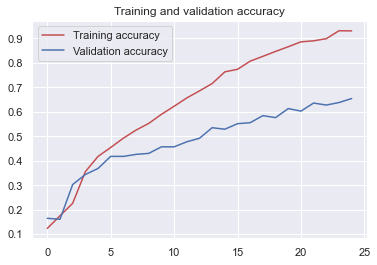

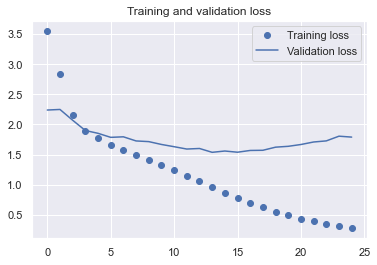

In [378]:
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model CNN-7

# CNN - Custom Activation Function

# ReLU^1.21525

In [331]:
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Lambda

def custom_activation(x):
   return  K.relu(x)**1.2125
    
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [332]:
cnn8 = Sequential()

cnn8.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn8.add(MaxPooling2D((2, 2)))

cnn8.add(Activation(custom_activation, name='SpecialActivation'))
cnn8.add(MaxPooling2D(pool_size=(2, 2)))
cnn8.add(Dropout(0.2))

cnn8.add(Activation(custom_activation, name='SpecialActivation1'))
cnn8.add(Dropout(0.2))

cnn8.add(Activation(custom_activation, name='SpecialActivation11'))
cnn8.add(Dropout(0.2))

cnn8.add(Flatten())

cnn8.add(Dense(10, activation='softmax'))

In [333]:
cnn8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn8.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 SpecialActivation (Activati  (None, 49, 49, 32)       0         
 on)                                                             
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_118 (Dropout)       (None, 24, 24, 32)        0         
                                                     

In [334]:
history8 = cnn8.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score8 = cnn8.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Epoch 1/25
8/8 [==============================] - 11s 1s/step - loss: 2.3616 - accuracy: 0.1222 - val_loss: 2.2598 - val_accuracy: 0.1687
Epoch 2/25
8/8 [==============================] - 10s 1s/step - loss: 2.2316 - accuracy: 0.1706 - val_loss: 2.2138 - val_accuracy: 0.1811
Epoch 3/25
8/8 [==============================] - 11s 1s/step - loss: 2.1078 - accuracy: 0.2825 - val_loss: 2.1304 - val_accuracy: 0.3436
Epoch 4/25
8/8 [==============================] - 11s 1s/step - loss: 1.9765 - accuracy: 0.4036 - val_loss: 2.0367 - val_accuracy: 0.3930
Epoch 5/25
8/8 [==============================] - 11s 1s/step - loss: 1.8157 - accuracy: 0.4665 - val_loss: 1.9760 - val_accuracy: 0.3909
Epoch 6/25
8/8 [==============================] - 10s 1s/step - loss: 1.6867 - accuracy: 0.4985 - val_loss: 1.8452 - val_accuracy: 0.4444
Epoch 7/25
8/8 [==============================] - 10s 1s/step - loss: 1.5421 - accuracy: 0.5500 - val_loss: 1.7884 - val_accuracy: 0.4300
Epoch 8/25
8/8 [==================

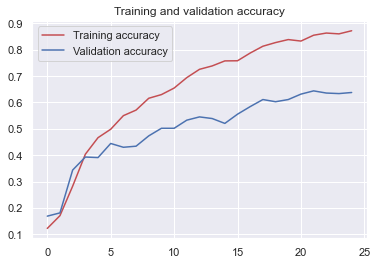

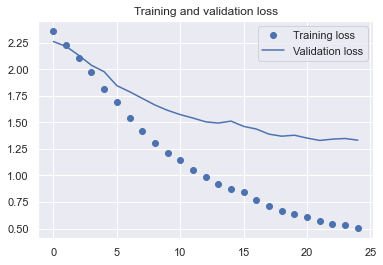

In [380]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [404]:
import matplotlib.pyplot as plt

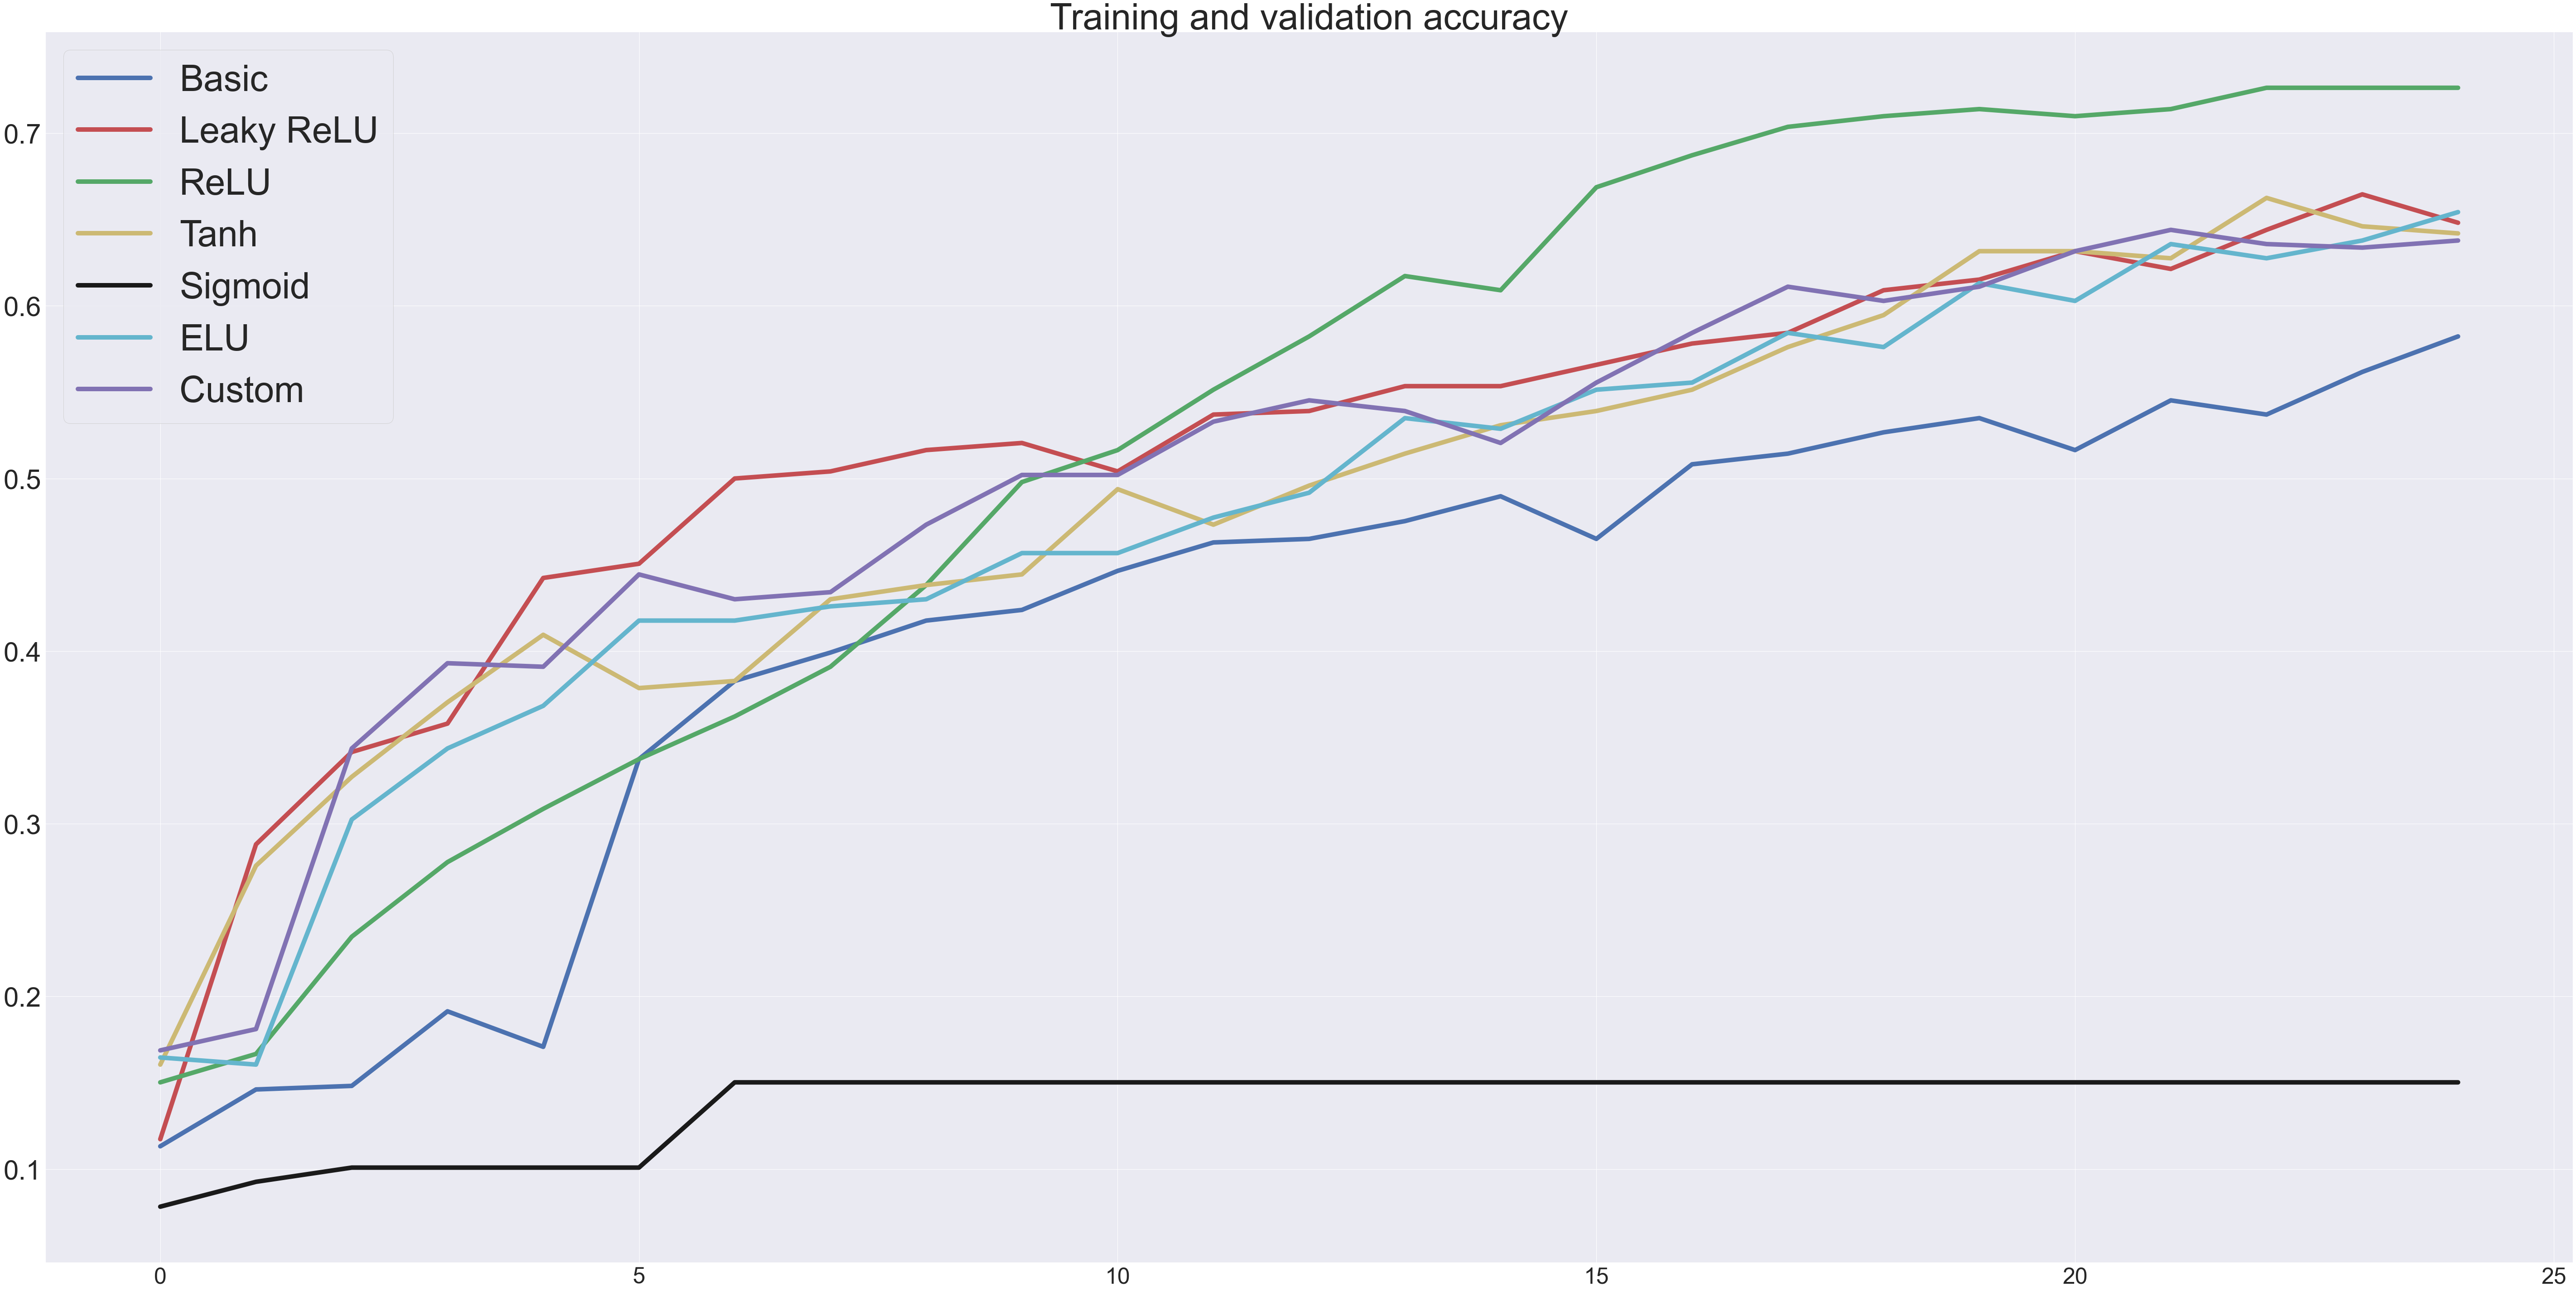

In [458]:
val_acc1 = history1.history['val_accuracy']
val_acc2 = history2.history['val_accuracy']
val_acc3 = history3.history['val_accuracy']
val_acc4 = history5.history['val_accuracy']
val_acc5 = history6.history['val_accuracy']
val_acc6 = history7.history['val_accuracy']
val_acc7 = history8.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, val_acc1, 'b', linewidth=10,label='Basic')
plt.plot(epochs, val_acc2, 'r', linewidth=10,label='Leaky ReLU')
plt.plot(epochs, val_acc3, 'g', linewidth=10,label='ReLU')
plt.plot(epochs, val_acc4, 'y', linewidth=10,label='Tanh')
plt.plot(epochs, val_acc5, 'k', linewidth=10,label='Sigmoid')
plt.plot(epochs, val_acc6, 'c', linewidth=10,label='ELU')
plt.plot(epochs, val_acc7, 'm', linewidth=10,label='Custom')
plt.xticks(size = 50)
plt.yticks(size = 60)
plt.title('Training and validation accuracy',fontsize=80)
plt.legend(loc=0)
plt.legend(fontsize=80) # using a size in points
plt.show()


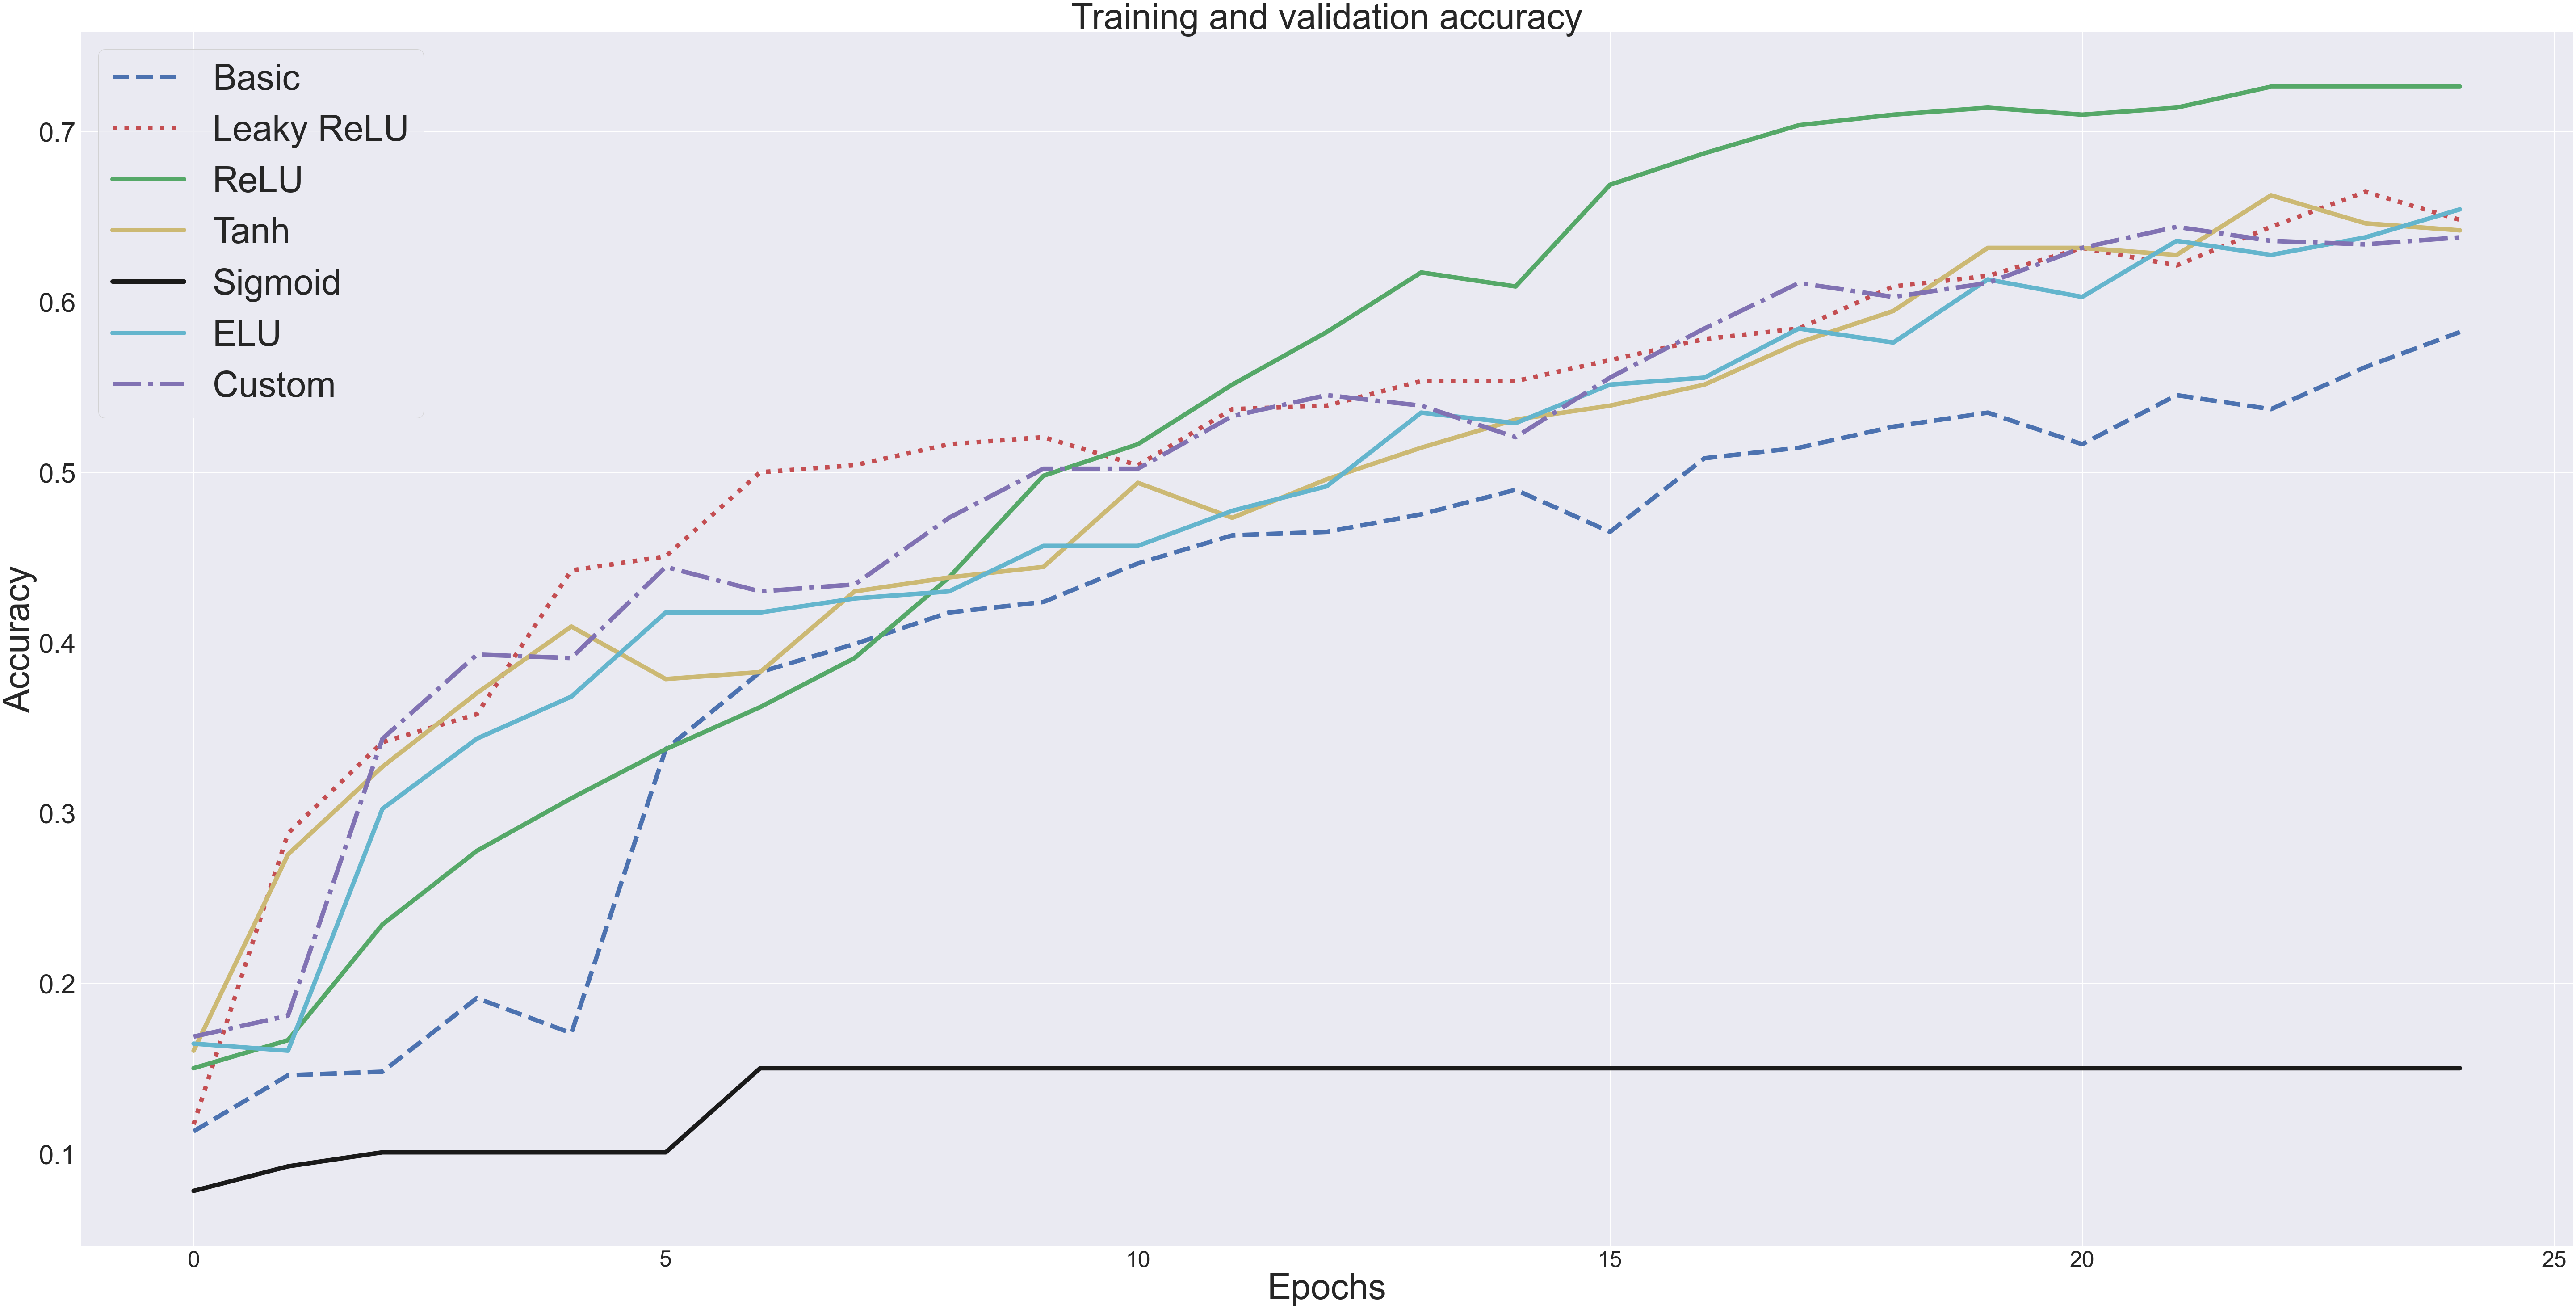

In [489]:
val_acc1 = history1.history['val_accuracy']
val_acc2 = history2.history['val_accuracy']
val_acc3 = history3.history['val_accuracy']
val_acc4 = history5.history['val_accuracy']
val_acc5 = history6.history['val_accuracy']
val_acc6 = history7.history['val_accuracy']
val_acc7 = history8.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, val_acc1, 'b',linestyle='dashed', linewidth=10,label='Basic')
plt.plot(epochs, val_acc2, 'r',linestyle='dotted', linewidth=10,label='Leaky ReLU')
plt.plot(epochs, val_acc3, 'g',linewidth=10,label='ReLU')
plt.plot(epochs, val_acc4, 'y', linewidth=10,label='Tanh')
plt.plot(epochs, val_acc5, 'k', linewidth=10,label='Sigmoid')
plt.plot(epochs, val_acc6, 'c', linewidth=10,label='ELU')
plt.plot(epochs, val_acc7, 'm',linestyle='dashdot', linewidth=10,label='Custom')
plt.xticks(size = 50)
plt.yticks(size = 60)
plt.title('Training and validation accuracy',fontsize=80)
plt.legend(loc=0)
plt.legend(fontsize=80) # using a size in points
plt.axis('tight');
plt.xlabel("Epochs",fontsize=80)
plt.ylabel("Accuracy",fontsize=80)
plt.show()


In [4]:
cnn9 = Sequential()

cnn9.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn9.add(MaxPooling2D((2, 2)))

cnn9.add(LeakyReLU(alpha=0.05))
cnn9.add(MaxPooling2D(pool_size=(2, 2)))
cnn9.add(Dropout(0.2))

cnn9.add(LeakyReLU(alpha=0.05))
cnn9.add(Dropout(0.2))

cnn9.add(LeakyReLU(alpha=0.05))
cnn9.add(Dropout(0.2))

cnn9.add(Flatten())

cnn9.add(Dense(10, activation='softmax'))

In [5]:
cnn9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 32)        0

In [23]:
history9 = cnn9.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn9.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Epoch 1/25
8/8 [==============================] - 17s 1s/step - loss: 2.4690 - accuracy: 0.1376 - val_loss: 2.3858 - val_accuracy: 0.1523
Epoch 2/25
8/8 [==============================] - 9s 1s/step - loss: 2.1914 - accuracy: 0.2093 - val_loss: 2.1409 - val_accuracy: 0.2778
Epoch 3/25
8/8 [==============================] - 9s 1s/step - loss: 1.9700 - accuracy: 0.3619 - val_loss: 1.9754 - val_accuracy: 0.3539
Epoch 4/25
8/8 [==============================] - 9s 1s/step - loss: 1.8040 - accuracy: 0.4500 - val_loss: 1.8547 - val_accuracy: 0.3971
Epoch 5/25
8/8 [==============================] - 9s 1s/step - loss: 1.6716 - accuracy: 0.5160 - val_loss: 1.7999 - val_accuracy: 0.3951
Epoch 6/25
8/8 [==============================] - 8s 1s/step - loss: 1.5541 - accuracy: 0.5505 - val_loss: 1.6875 - val_accuracy: 0.4630
Epoch 7/25
8/8 [==============================] - 9s 1s/step - loss: 1.4474 - accuracy: 0.5814 - val_loss: 1.6340 - val_accuracy: 0.4815
Epoch 8/25
8/8 [========================

## LeakyReLU with different values of alpha:

In [41]:
cnn10 = Sequential()

cnn10.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn10.add(MaxPooling2D((2, 2)))

cnn10.add(LeakyReLU(alpha=0.25))
cnn10.add(MaxPooling2D(pool_size=(2, 2)))
cnn10.add(Dropout(0.2))

cnn10.add(LeakyReLU(alpha=0.25))
cnn10.add(Dropout(0.2))

cnn10.add(LeakyReLU(alpha=0.25))
cnn10.add(Dropout(0.2))

cnn10.add(Flatten())

cnn10.add(Dense(10, activation='softmax'))

In [42]:
cnn10.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn10.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 24, 24, 32)       

In [43]:
history10 = cnn10.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn10.evaluate(X_val, Y_val, verbose=0)


Epoch 1/25
8/8 [==============================] - 7s 816ms/step - loss: 2.4767 - accuracy: 0.1211 - val_loss: 2.3148 - val_accuracy: 0.1214
Epoch 2/25
8/8 [==============================] - 8s 965ms/step - loss: 2.1990 - accuracy: 0.2005 - val_loss: 2.1370 - val_accuracy: 0.2572
Epoch 3/25
8/8 [==============================] - 7s 901ms/step - loss: 2.0387 - accuracy: 0.3469 - val_loss: 2.0165 - val_accuracy: 0.3539
Epoch 4/25
8/8 [==============================] - 7s 902ms/step - loss: 1.8839 - accuracy: 0.4278 - val_loss: 1.9129 - val_accuracy: 0.3827
Epoch 5/25
8/8 [==============================] - 7s 892ms/step - loss: 1.7455 - accuracy: 0.4722 - val_loss: 1.8056 - val_accuracy: 0.4074
Epoch 6/25
8/8 [==============================] - 7s 847ms/step - loss: 1.6245 - accuracy: 0.5119 - val_loss: 1.7353 - val_accuracy: 0.4074
Epoch 7/25
8/8 [==============================] - 7s 894ms/step - loss: 1.5100 - accuracy: 0.5737 - val_loss: 1.6811 - val_accuracy: 0.4444
Epoch 8/25
8/8 [====

In [46]:
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Test loss: 1.2803109884262085
Test accuracy: 0.6275720000267029


In [37]:
cnn11 = Sequential()

cnn11.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn11.add(MaxPooling2D((2, 2)))

cnn11.add(LeakyReLU(alpha=0.2))
cnn11.add(MaxPooling2D(pool_size=(2, 2)))
cnn11.add(Dropout(0.2))

cnn11.add(LeakyReLU(alpha=0.2))
cnn11.add(Dropout(0.2))

cnn11.add(LeakyReLU(alpha=0.2))
cnn11.add(Dropout(0.2))

cnn11.add(Flatten())

cnn11.add(Dense(10, activation='softmax'))

In [38]:
cnn11.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 24, 24, 32)       

In [39]:
histor11 = cnn11.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn11.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Epoch 1/25
8/8 [==============================] - 8s 914ms/step - loss: 2.7659 - accuracy: 0.1021 - val_loss: 2.5376 - val_accuracy: 0.1235
Epoch 2/25
8/8 [==============================] - 7s 850ms/step - loss: 2.3440 - accuracy: 0.1763 - val_loss: 2.1627 - val_accuracy: 0.2798
Epoch 3/25
8/8 [==============================] - 7s 850ms/step - loss: 2.1124 - accuracy: 0.2309 - val_loss: 2.0889 - val_accuracy: 0.2654
Epoch 4/25
8/8 [==============================] - 7s 826ms/step - loss: 1.9381 - accuracy: 0.3670 - val_loss: 1.9420 - val_accuracy: 0.3560
Epoch 5/25
8/8 [==============================] - 7s 862ms/step - loss: 1.7917 - accuracy: 0.4510 - val_loss: 1.8466 - val_accuracy: 0.3642
Epoch 6/25
8/8 [==============================] - 7s 839ms/step - loss: 1.6679 - accuracy: 0.5031 - val_loss: 1.7613 - val_accuracy: 0.3848
Epoch 7/25
8/8 [==============================] - 7s 872ms/step - loss: 1.5797 - accuracy: 0.5237 - val_loss: 1.7098 - val_accuracy: 0.4177
Epoch 8/25
8/8 [====

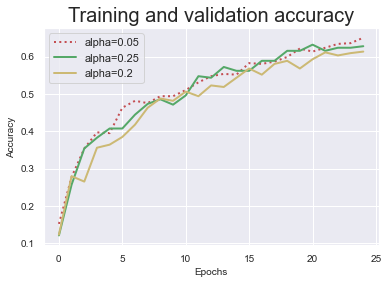

In [67]:
#val_acc1 = history2.history['val_accuracy']
val_acc2 = history9.history['val_accuracy']
val_acc3 = history10.history['val_accuracy']
val_acc4 = histor11.history['val_accuracy']


epochs = range(25)

#plt.plot(epochs, val_acc1, 'b',linestyle='dashed', linewidth=10,label='Basic')
plt.plot(epochs, val_acc2, 'r',linestyle='dotted', linewidth=2,label='alpha=0.05')
plt.plot(epochs, val_acc3, 'g',linewidth=2,label='alpha=0.25')
plt.plot(epochs, val_acc4, 'y', linewidth=2,label='alpha=0.2')

plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Training and validation accuracy',fontsize=20)
plt.legend(loc=0)
#plt.legend(fontsize=80) # using a size in points
plt.axis('tight');
plt.xlabel("Epochs",fontsize=10)
plt.ylabel("Accuracy",fontsize=10)
plt.show()


In [9]:
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Lambda

def custom_activation(x):
   return  K.relu(x)**1.2125
    
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


# CNN with ReLU + Custom Activation + Tanh

In [51]:
cnn12 = Sequential()

cnn12.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn12.add(MaxPooling2D((2, 2)))

cnn12.add(Conv2D(74, kernel_size=(3, 3), activation='relu'))
cnn12.add(MaxPooling2D(pool_size=(2, 2)))
cnn12.add(Dropout(0.2))

cnn12.add(Activation(custom_activation, name='SpecialActivation'))
cnn12.add(Dropout(0.2))

cnn12.add(Conv2D(74, kernel_size=(3, 3), activation='tanh'))
cnn12.add(Dropout(0.2))

cnn12.add(Flatten())

cnn12.add(Dense(10, activation='softmax'))

In [52]:
cnn12.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn12.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 74)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 23, 23, 74)        0         
                                                                 
 SpecialActivation (Activati  (None, 23, 23, 74)      

In [53]:
histor12 = cnn12.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn12.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Epoch 1/25
8/8 [==============================] - 19s 2s/step - loss: 2.7261 - accuracy: 0.1155 - val_loss: 2.2801 - val_accuracy: 0.1440
Epoch 2/25
8/8 [==============================] - 18s 2s/step - loss: 2.2768 - accuracy: 0.1861 - val_loss: 2.3069 - val_accuracy: 0.1235
Epoch 3/25
8/8 [==============================] - 18s 2s/step - loss: 2.2308 - accuracy: 0.1933 - val_loss: 2.2053 - val_accuracy: 0.2202
Epoch 4/25
8/8 [==============================] - 19s 2s/step - loss: 2.0891 - accuracy: 0.2660 - val_loss: 1.9663 - val_accuracy: 0.3292
Epoch 5/25
8/8 [==============================] - 19s 2s/step - loss: 1.8732 - accuracy: 0.3732 - val_loss: 1.8521 - val_accuracy: 0.3457
Epoch 6/25
8/8 [==============================] - 18s 2s/step - loss: 1.7413 - accuracy: 0.4124 - val_loss: 1.7892 - val_accuracy: 0.3724
Epoch 7/25
8/8 [==============================] - 18s 2s/step - loss: 1.5979 - accuracy: 0.4665 - val_loss: 1.6726 - val_accuracy: 0.4218
Epoch 8/25
8/8 [==================

# CNN with ReLU + Tanh + Custom Activation

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [31]:
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Lambda

def custom_activation(x):
   return  K.relu(x)**1.2125
    
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [32]:
cnn13 = Sequential()

cnn13.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn13.add(MaxPooling2D((2, 2)))

cnn13.add(Conv2D(74, kernel_size=(3, 3), activation='relu'))
cnn13.add(MaxPooling2D(pool_size=(2, 2)))
cnn13.add(Dropout(0.2))

cnn13.add(Conv2D(74, kernel_size=(3, 3), activation='tanh'))
cnn13.add(Dropout(0.2))

cnn13.add(Activation(custom_activation, name='SpecialActivation'))
cnn13.add(Dropout(0.2))

cnn13.add(Flatten())

cnn13.add(Dense(10, activation='softmax'))

In [33]:
cnn13.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 74)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 74)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 74)       

In [34]:
histor13 = cnn13.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn13.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Epoch 1/25
8/8 [==============================] - 17s 2s/step - loss: 2.3456 - accuracy: 0.0974 - val_loss: 2.2951 - val_accuracy: 0.1379
Epoch 2/25
8/8 [==============================] - 17s 2s/step - loss: 2.2590 - accuracy: 0.1655 - val_loss: 2.2057 - val_accuracy: 0.2284
Epoch 3/25
8/8 [==============================] - 17s 2s/step - loss: 2.0844 - accuracy: 0.2665 - val_loss: 2.0840 - val_accuracy: 0.2860
Epoch 4/25
8/8 [==============================] - 18s 2s/step - loss: 1.8986 - accuracy: 0.3562 - val_loss: 2.0170 - val_accuracy: 0.2860
Epoch 5/25
8/8 [==============================] - 18s 2s/step - loss: 1.7582 - accuracy: 0.4284 - val_loss: 1.9113 - val_accuracy: 0.3601
Epoch 6/25
8/8 [==============================] - 17s 2s/step - loss: 1.6003 - accuracy: 0.4923 - val_loss: 1.7724 - val_accuracy: 0.4053
Epoch 7/25
8/8 [==============================] - 17s 2s/step - loss: 1.4655 - accuracy: 0.5211 - val_loss: 1.7072 - val_accuracy: 0.4444
Epoch 8/25
8/8 [==================

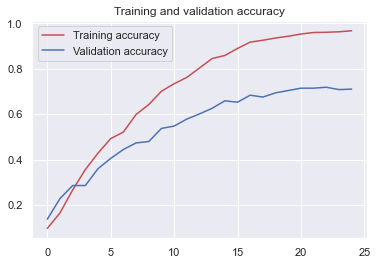

<Figure size 432x288 with 0 Axes>

In [37]:
acc = histor13.history['accuracy']
val_acc = histor13.history['val_accuracy']
loss = histor13.history['loss']
val_loss = histor13.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()